## Regresión DL

#### Importe de librerías y datos

In [1]:
import numpy as np
import tensorflow as tf
import math
from matplotlib import pyplot as plt
from urllib import request
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/molinos.csv"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",", skiprows = 1)
dataset

array([[1324.1, 1324.3, 1330. , ..., 1172.8,   12.1,  260. ],
       [1497.4, 1499. , 1499.1, ...,  679.2,   10.8,  254. ],
       [1724.9, 1750.3, 1467.2, ...,  316.3,    8.4,  253. ],
       ...,
       [ 230.3,  375.3,   73.4, ...,  291.1,    4.5,  355. ],
       [ 160.9,  326.9,   67.6, ...,  234.6,    4. ,  353. ],
       [  71.6,  190.7,   24.8, ...,   97.9,    4. ,  355. ]])

#### Curado de datos

In [3]:
dataset = dataset[np.sum(dataset >= 0, axis = 1) == 45]

#### Pasaje de velocidades a coordenadas cartesianas

In [4]:
def pasaje_a_cartesianas(dataset):
  dataset[:, 44] = (dataset[:, 44] + 270) % 360
  dataset[:, 44]
  x = np.array([math.cos(math.radians(dataset[i, 44])) * dataset[i, 43] for i in range(0, dataset.shape[0])]) 
  y = np.array([-math.sin(math.radians(dataset[i, 44])) * dataset[i, 43] for i in range(0, dataset.shape[0])]) 
  dataset[:, 43] = x
  dataset[:, 44] = y

In [5]:
dataset[:, 44] = (dataset[:, 44] + 270) % 360
dataset[:, 44]

array([ 41.,  42.,  44., ..., 264., 265., 263.])

In [6]:
x = np.array([math.cos(math.radians(dataset[i, 44])) * dataset[i, 43] for i in range(0, dataset.shape[0])]) 
y = np.array([-math.sin(math.radians(dataset[i, 44])) * dataset[i, 43] for i in range(0, dataset.shape[0])]) 

In [7]:
dataset[:, 43] = x
dataset[:, 44] = y

In [8]:
x_train = dataset[:, :43]
y_train = dataset[:, 43:]

In [9]:
x_train = (x_train - x_train.mean(axis=0))/x_train.std(axis=0)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(43,))) 
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(2))
model.compile(optimizer = 'rmsprop', loss = 'MeanSquaredError')

In [11]:
hist = model.fit(x=x_train, y=y_train, batch_size = 128, epochs=30)

Epoch 1/30
647/647 [==============================] - 3s 3ms/step - loss: 19.5491
Epoch 2/30
647/647 [==============================] - 2s 3ms/step - loss: 15.7972
Epoch 3/30
647/647 [==============================] - 2s 3ms/step - loss: 14.6858
Epoch 4/30
647/647 [==============================] - 2s 3ms/step - loss: 14.0418
Epoch 5/30
647/647 [==============================] - 2s 3ms/step - loss: 13.6445
Epoch 6/30
647/647 [==============================] - 2s 3ms/step - loss: 13.2878
Epoch 7/30
647/647 [==============================] - 2s 3ms/step - loss: 12.9990
Epoch 8/30
647/647 [==============================] - 2s 3ms/step - loss: 12.8102
Epoch 9/30
647/647 [==============================] - 2s 3ms/step - loss: 12.6118
Epoch 10/30
647/647 [==============================] - 2s 3ms/step - loss: 12.3600
Epoch 11/30
647/647 [==============================] - 2s 3ms/step - loss: 12.2790
Epoch 12/30
647/647 [==============================] - 2s 3ms/step - loss: 12.0997
Epoch 13/30
6

In [17]:
print(y_train)

[[-0.68332638  6.68206673]
 [-0.59694951  6.13914768]
 [-0.62900137  6.08194883]
 ...
 [-0.05282965 -0.56197599]
 [-0.03065487 -0.391001  ]
 [-0.03375164 -0.48630753]]


63/63 [==============================] - 0s 2ms/step


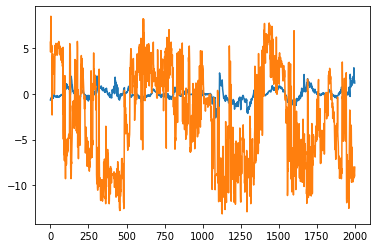

In [20]:
plt.plot(y_train[:2000, 0])
plt.plot(model.predict(x_train[:2000])[:, 0])

63/63 [==============================] - 0s 1ms/step


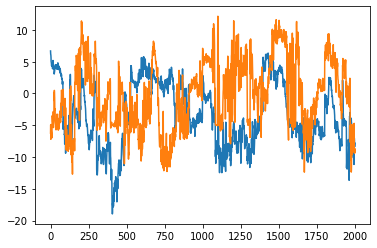

In [21]:
plt.plot(y_train[:2000, 1])
plt.plot(model.predict(x_train[:2000])[:, 1])

#### Guardado del modelo

In [12]:
model.save('regresor_molinos.h5')

#### Script

In [13]:
def apply_model(dataset):
  model = tf.keras.models.load_model('regresor_molinos.h5')
  pasaje_a_cartesianas(dataset)
  x = dataset[:, :43]
  x = (x - x.mean(axis=0))/x.std(axis=0)
  y = dataset[:, 43:]
  predicted = model.predict(x)
  ecm = np.sum((predicted - y) ** 2 / len(x))
  return ecm

In [14]:
apply_model(dataset)

2586/2586 [==============================] - 3s 1ms/step


101.05202644679441